# Portuguese Bank Marketing Campaign Prediction

# Business Case:

This project aims to assist a Portuguese bank in optimizing its telemarketing campaign strategy for term deposit products. By analyzing historical marketing data and customer attributes, we build a predictive model that identifies potential customers who are more likely to subscribe to a term deposit. This helps the bank reduce campaign costs, improve conversion rates, and enhance customer satisfaction through targeted marketing.

# Importing the important Libraries

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [6]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Attribute Information

age – Age of the client

job – Type of job (e.g., admin., technician, retired, etc.)

marital – Marital status of the client

education – Education level of the client

default – Whether the client has credit in default

housing – Whether the client has a housing loan

loan – Whether the client has a personal loan

contact – Contact communication type used in the campaign

month – Month of last contact during the campaign

day_of_week – Day of the week of the last contact

duration – Duration of the last contact in seconds

campaign – Number of contacts performed during this campaign

pdays – Days since the client was last contacted from a previous campaign (999 means never)

previous – Number of contacts performed before this campaign

poutcome – Outcome of the previous marketing campaign

emp.var.rate – Employment variation rate (quarterly indicator)

cons.price.idx – Consumer price index (monthly indicator)

cons.conf.idx – Consumer confidence index (monthly indicator)

euribor3m – Euribor 3-month interest rate

nr.employed – Number of employees (quarterly indicator)

y – Target variable: whether the client subscribed to a term deposit

In [17]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [64]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [65]:
for col in df.columns:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts(dropna=False))


Value counts for column: age
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

Value counts for column: job
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Value counts for column: marital
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Value counts for column: education
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Value counts for column: d

In [66]:
df.isnull().sum().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

# EDA

In [67]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

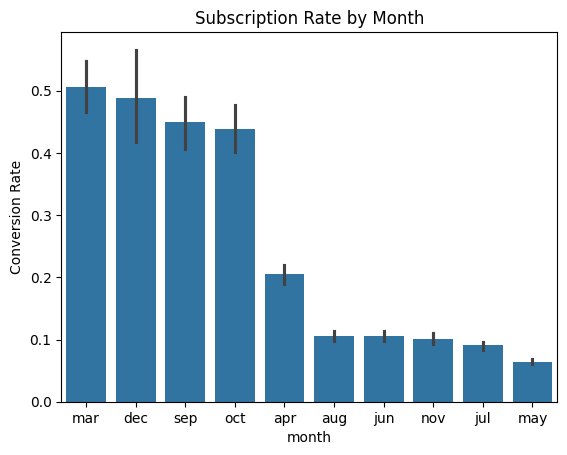

In [68]:
order = df.groupby('month')['y'].mean().sort_values(ascending=False).index
sns.barplot(x='month', y='y', data=df, order=order)
plt.title("Subscription Rate by Month")
plt.ylabel("Conversion Rate")
plt.show()

* March has the highest subscription rate, making it the best month for marketing. December and September also show good subscription rates.

* April, May, July, August, June, and November have low subscription rates.

* May has the lowest subscription rate, making it the least effective month for marketing.

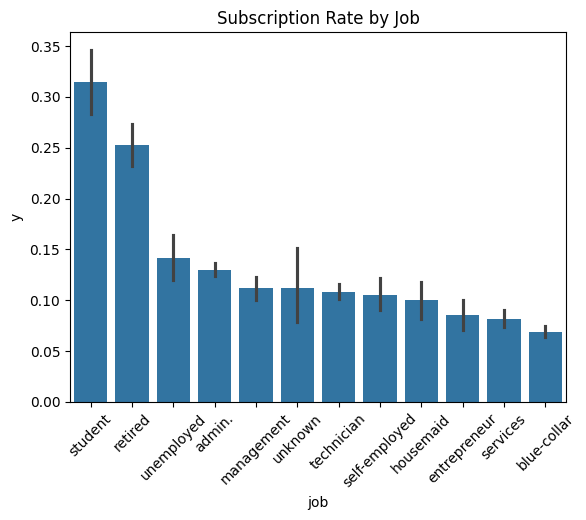

In [69]:
order = df.groupby('job')['y'].mean().sort_values(ascending=False).index
sns.barplot(x='job', y='y', data=df, order=order)
plt.title("Subscription Rate by Job")
plt.xticks(rotation=45)
plt.show()

* Students, and Retired people have the highest subscription rate among all job types.

* Unemployed and administrative workers have a moderate subscription rate.

* Blue-collar workers Entrepreneur, services, and housemaid categories have the lowest subscription rate.

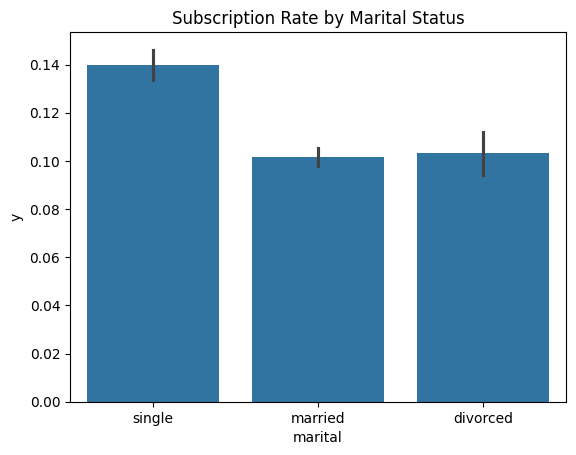

In [70]:
sns.barplot(x='marital', y='y', data=df, order=['single', 'married', 'divorced'])
plt.title("Subscription Rate by Marital Status")
plt.show()

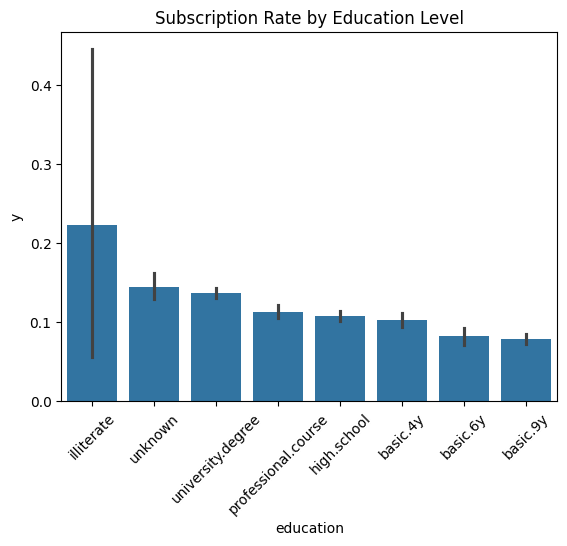

In [71]:
order = df.groupby('education')['y'].mean().sort_values(ascending=False).index
sns.barplot(x='education', y='y', data=df, order=order)
plt.title("Subscription Rate by Education Level")
plt.xticks(rotation=45)
plt.show()

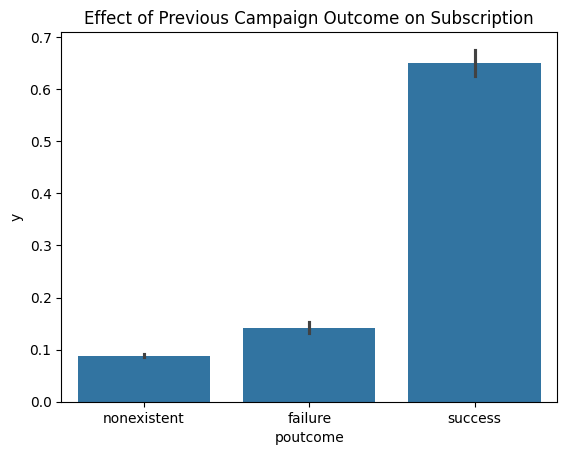

In [72]:
sns.barplot(x='poutcome', y='y', data=df)
plt.title("Effect of Previous Campaign Outcome on Subscription")
plt.show()

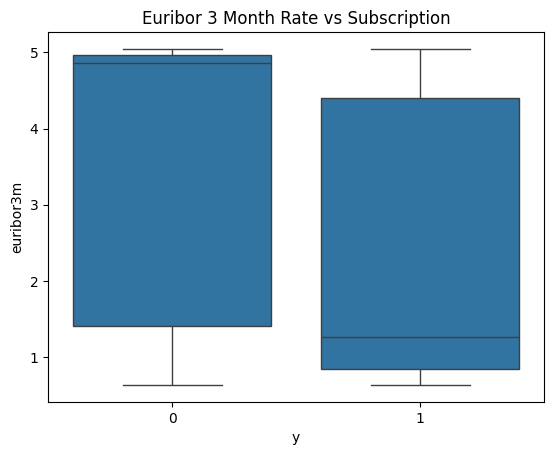

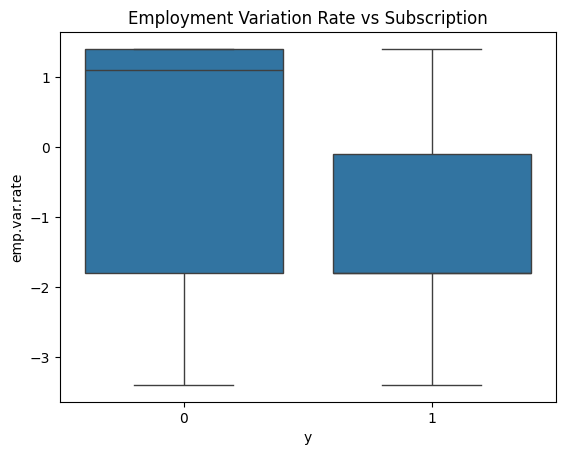

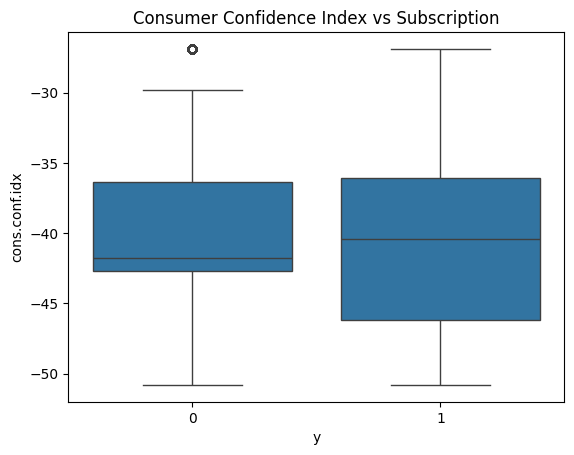

In [73]:
sns.boxplot(x='y', y='euribor3m', data=df)
plt.title("Euribor 3 Month Rate vs Subscription")
plt.show()

sns.boxplot(x='y', y='emp.var.rate', data=df)
plt.title("Employment Variation Rate vs Subscription")
plt.show()

sns.boxplot(x='y', y='cons.conf.idx', data=df)
plt.title("Consumer Confidence Index vs Subscription")
plt.show()

* People who subscribed had lower Euribor 3-month rates compared to those who did not.

* Subscriptions were higher when the employment variation rate was lower or negative.

* People were more likely to subscribe when the consumer confidence index was low.

* Higher Euribor rates, higher employment variation, and higher consumer confidence were more common among those who did not subscribe.

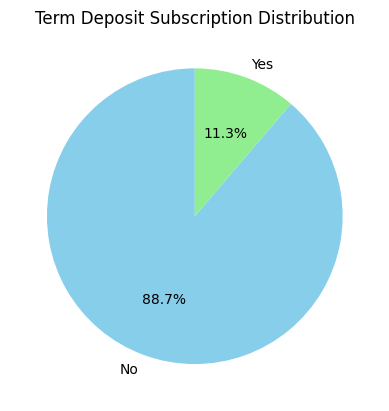

In [74]:
# Pie chart showing the proportion of subscription outcomes
df['y'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No', 'Yes'], colors=['skyblue', 'lightgreen'], startangle=90)
plt.title("Term Deposit Subscription Distribution")
plt.ylabel("")
plt.show()

* Only 11.3 percent of customers subscribed to the term deposit, while 88.7 percent did not.

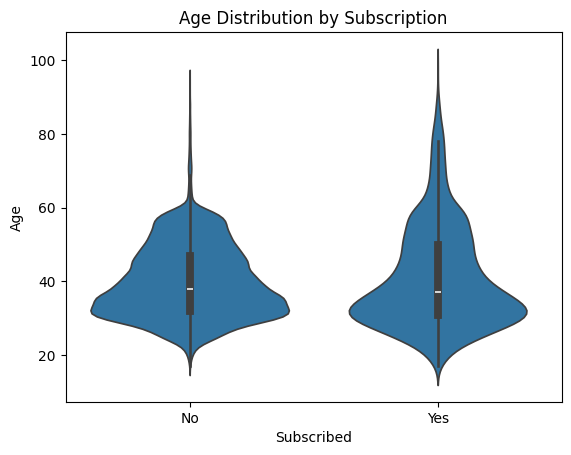

In [75]:
sns.violinplot(x='y', y='age', data=df)
plt.title("Age Distribution by Subscription")
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel("Subscribed")
plt.ylabel("Age")
plt.show()

* People of all ages subscribed, but younger and middle-aged customers subscribed slightly more than older ones.

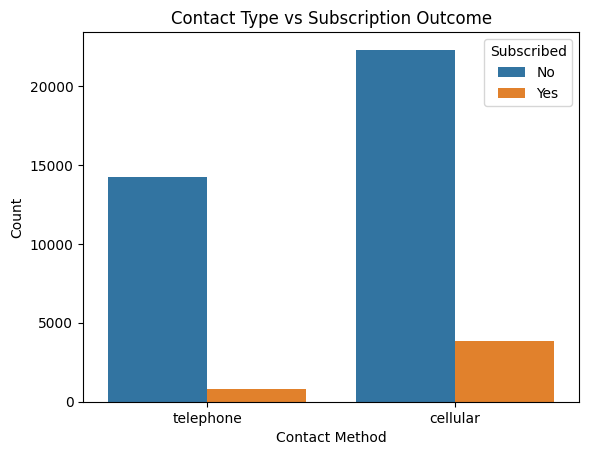

In [76]:
sns.countplot(x='contact', hue='y', data=df)
plt.title("Contact Type vs Subscription Outcome")
plt.xlabel("Contact Method")
plt.ylabel("Count")
plt.legend(title="Subscribed", labels=['No', 'Yes'])
plt.show()

* More people subscribed when they were contacted by cellular compared to telephone.

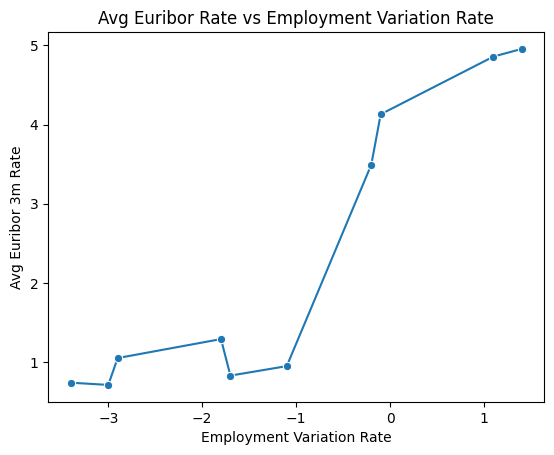

In [77]:
line_df = df.groupby('emp.var.rate')['euribor3m'].mean().reset_index()
sns.lineplot(x='emp.var.rate', y='euribor3m', data=line_df, marker='o')
plt.title("Avg Euribor Rate vs Employment Variation Rate")
plt.xlabel("Employment Variation Rate")
plt.ylabel("Avg Euribor 3m Rate")
plt.show()

* As the employment variation rate increases, the average Euribor 3-month rate also increases.

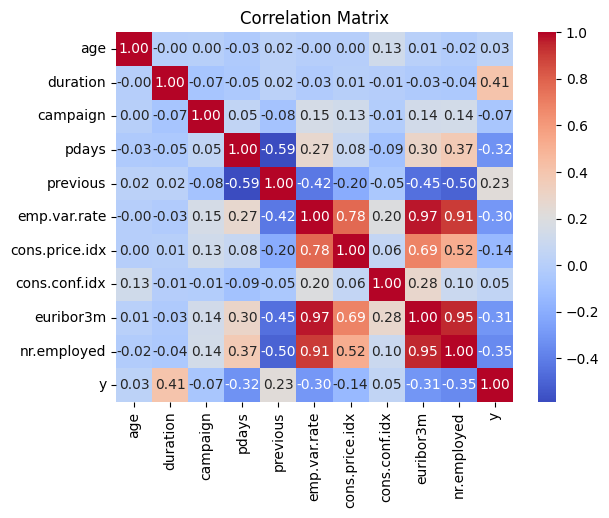

In [78]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Feature Engineering

In [79]:
# It leaks the target variable (y) because duration is known only after the call is made.
df.drop('duration', axis=1, inplace=True)

In [80]:
# Default have almost all value no, only 3 values are yes. They don’t help much.
df.drop('default', axis=1, inplace=True)

* A lot of features have 'unknown', which are similar to missing values. Replace them with NaN and impute

In [81]:
df = df.replace('unknown', np.nan)

In [82]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values>0]
missing_values

job           330
marital        80
education    1731
housing       990
loan          990
dtype: int64

In [83]:
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['marital'].fillna(df['marital'].mode()[0], inplace=True)
df['housing'].fillna(df['housing'].mode()[0], inplace=True)
df['loan'].fillna(df['loan'].mode()[0], inplace=True)

In [84]:
cat_cols = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)

* These features are nominal, meaning their values are categories without any order (like job, contact, etc.).

* One-hot encoding prevents the model from assuming any ranking or relationship between these values.

In [85]:
df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [86]:
scale_cols = ['age', 'campaign', 'pdays', 'previous',
              'emp.var.rate', 'cons.price.idx',
              'cons.conf.idx', 'euribor3m', 'nr.employed']

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [87]:
df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


# Training the model

In [88]:
from sklearn.model_selection import train_test_split
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [89]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

from collections import Counter
print("After SMOTE:", Counter(y_train_balanced))

After SMOTE: Counter({0: 29238, 1: 29238})


# Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train_balanced, y_train_balanced)

LogisticRegression()

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
y_pred = lg.predict(X_test)
print('Testing Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test, y_pred))

Testing Accuracy Score: 0.7926681233309055
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.83      0.88      7310
           1       0.27      0.51      0.36       928

    accuracy                           0.79      8238
   macro avg       0.60      0.67      0.62      8238
weighted avg       0.86      0.79      0.82      8238



In [94]:
y_pred = lg.predict(X_train_balanced)
print('Training Accuracy Score:', accuracy_score(y_train_balanced, y_pred))
print('Classification Report: \n',classification_report(y_train_balanced, y_pred))

Training Accuracy Score: 0.79892605513373
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.83      0.81     29238
           1       0.82      0.77      0.79     29238

    accuracy                           0.80     58476
   macro avg       0.80      0.80      0.80     58476
weighted avg       0.80      0.80      0.80     58476



# Hyperparameter Tuning

In [95]:
model = LogisticRegression()
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters and the values to search
grid = {
    'C': [100,200,500],    # Regularization strength
    'penalty': ['l1', 'l2'],
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] # Regularization types
}

# Set up GridSearchCV
grid = GridSearchCV(model, param_grid=grid, cv=5, scoring='accuracy')
grid.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [96]:
y_pred = grid.predict(X_test)
print('Testing Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test, y_pred))

Testing Accuracy Score: 0.7929109007040543
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.83      0.88      7310
           1       0.27      0.51      0.36       928

    accuracy                           0.79      8238
   macro avg       0.60      0.67      0.62      8238
weighted avg       0.86      0.79      0.82      8238



In [97]:
y_pred = grid.predict(X_train_balanced)
print('Training Accuracy Score:', accuracy_score(y_train_balanced, y_pred))
print('Classification Report: \n',classification_report(y_train_balanced, y_pred))

Training Accuracy Score: 0.7986695396401943
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80     29238
           1       0.82      0.77      0.79     29238

    accuracy                           0.80     58476
   macro avg       0.80      0.80      0.80     58476
weighted avg       0.80      0.80      0.80     58476



# Support Vector Classifier

In [98]:
from sklearn.svm import SVC 
svclassifier = SVC() 
svclassifier.fit(X_train_balanced, y_train_balanced) 

SVC()

In [99]:
y_pred = svclassifier.predict(X_test)
print('Testing Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test, y_pred))

Testing Accuracy Score: 0.8191308570041272
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      7310
           1       0.32      0.53      0.40       928

    accuracy                           0.82      8238
   macro avg       0.63      0.69      0.64      8238
weighted avg       0.86      0.82      0.84      8238



In [100]:
y_pred = svclassifier.predict(X_train_balanced)
print('Training Accuracy Score:', accuracy_score(y_train_balanced, y_pred))
print('Classification Report: \n',classification_report(y_train_balanced, y_pred))

Training Accuracy Score: 0.8309733907928039
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84     29238
           1       0.86      0.80      0.82     29238

    accuracy                           0.83     58476
   macro avg       0.83      0.83      0.83     58476
weighted avg       0.83      0.83      0.83     58476



In [101]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],

    'gamma': ['scale', 'auto']}

In [103]:
# Importing RandomizedSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV

# Assigning SVC model into variables
model = SVC(kernel='linear')
grid = RandomizedSearchCV(model, param_distributions=param_grid, refit=True,
                          verbose=1, scoring='f1', cv=2, n_iter=10, n_jobs=-1)

# fitting the model for grid search
grid.fit(X_train_balanced, y_train_balanced)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=SVC(kernel='linear'), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='f1', verbose=1)

In [105]:
y_pred=grid.predict(X_test)
print('Testing Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test, y_pred))

Testing Accuracy Score: 0.8150036416605972
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      7310
           1       0.29      0.45      0.36       928

    accuracy                           0.82      8238
   macro avg       0.61      0.66      0.62      8238
weighted avg       0.85      0.82      0.83      8238



In [106]:
y_pred = grid.predict(X_train_balanced)
print('Training Accuracy Score:', accuracy_score(y_train_balanced, y_pred))
print('Classification Report: \n',classification_report(y_train_balanced, y_pred))

Training Accuracy Score: 0.8548806347903414
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     29238
           1       0.87      0.83      0.85     29238

    accuracy                           0.85     58476
   macro avg       0.86      0.85      0.85     58476
weighted avg       0.86      0.85      0.85     58476



# Decision Tree Classifier

In [118]:
# Initialize and train the model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier()

In [119]:
y_pred_dt = dt_model.predict(X_test)
print("Testing Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Testing Accuracy Score: 0.8275066763777615

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      7310
           1       0.29      0.37      0.33       928

    accuracy                           0.83      8238
   macro avg       0.60      0.63      0.61      8238
weighted avg       0.85      0.83      0.84      8238



In [120]:
y_pred = dt_model.predict(X_train_balanced)
print('Training Accuracy Score:', accuracy_score(y_train_balanced, y_pred))
print('Classification Report: \n',classification_report(y_train_balanced, y_pred))

Training Accuracy Score: 0.996733702715644
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     29238
           1       1.00      0.99      1.00     29238

    accuracy                           1.00     58476
   macro avg       1.00      1.00      1.00     58476
weighted avg       1.00      1.00      1.00     58476



# Hyperparameter Tuning 

In [123]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [124]:
dt = DecisionTreeClassifier(random_state=3)
grid_search = GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,n_jobs=-1,
                           scoring='accuracy',verbose=0)

In [125]:
grid_search.fit(X_train_balanced, y_train_balanced)

best_dt_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [126]:
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluate
print("Tuned Decision Tree Testing Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_dt))

Tuned Decision Tree Testing Accuracy: 0.8401310997815004

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      7310
           1       0.31      0.35      0.33       928

    accuracy                           0.84      8238
   macro avg       0.61      0.63      0.62      8238
weighted avg       0.85      0.84      0.84      8238



In [127]:
# Predict on test data
y_pred_best_dt = best_dt_model.predict(X_train_balanced)

# Evaluate
print("Tuned Decision Tree Training Accuracy:", accuracy_score(y_train_balanced, y_pred_best_dt))
print("\nClassification Report:\n", classification_report(y_train_balanced, y_pred_best_dt))

Tuned Decision Tree Training Accuracy: 0.9793932553526233

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     29238
           1       0.99      0.97      0.98     29238

    accuracy                           0.98     58476
   macro avg       0.98      0.98      0.98     58476
weighted avg       0.98      0.98      0.98     58476



# Random Forest Classifier

In [128]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_balanced,y_train_balanced)

RandomForestClassifier()

In [129]:
y_pred = rf.predict(X_train_balanced)
print('Training Accuracy Score', accuracy_score(y_train_balanced,y_pred))
print('\n Classification Report \n', classification_report(y_train_balanced,y_pred))

Training Accuracy Score 0.9967166016827417

 Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29238
           1       1.00      1.00      1.00     29238

    accuracy                           1.00     58476
   macro avg       1.00      1.00      1.00     58476
weighted avg       1.00      1.00      1.00     58476



In [130]:
y_pred = rf.predict(X_test)
print('Testing Accuracy Score', accuracy_score(y_test,y_pred))
print('\n Classification Report \n', classification_report(y_test,y_pred))

Testing Accuracy Score 0.8758193736343772

 Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7310
           1       0.45      0.43      0.44       928

    accuracy                           0.88      8238
   macro avg       0.69      0.68      0.68      8238
weighted avg       0.87      0.88      0.87      8238



# Hyperparameter Tuning

In [131]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [132]:
# Initialize the model
rf = RandomForestClassifier()

# GridSearchCV
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train_balanced, y_train_balanced)

# Best Model
best_rf = grid_rf.best_estimator_
print("Best Parameters:", grid_rf.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [133]:
# Evaluate
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Testing Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Testing Accuracy: 0.8809176984705025
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7310
           1       0.47      0.39      0.42       928

    accuracy                           0.88      8238
   macro avg       0.69      0.67      0.68      8238
weighted avg       0.87      0.88      0.88      8238



In [134]:
# Evaluate
y_pred_rf = best_rf.predict(X_train_balanced)
print("Random Forest Training Accuracy:", accuracy_score(y_train_balanced, y_pred_rf))
print(classification_report(y_train_balanced, y_pred_rf))

Random Forest Training Accuracy: 0.994168547780286
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29238
           1       1.00      0.99      0.99     29238

    accuracy                           0.99     58476
   macro avg       0.99      0.99      0.99     58476
weighted avg       0.99      0.99      0.99     58476



# XGBoosting Classifier

In [135]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,       # L1 regularization
    reg_lambda=1.0,      # L2 regularization
    random_state=0,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb.fit(X_train_balanced, y_train_balanced)
y_pred = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


XGBoost Accuracy: 0.883102694828842
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7310
           1       0.48      0.44      0.46       928

    accuracy                           0.88      8238
   macro avg       0.70      0.69      0.70      8238
weighted avg       0.88      0.88      0.88      8238



In [136]:
y_pred = xgb.predict(X_train_balanced)
print("XGBoost Accuracy:", accuracy_score(y_train_balanced, y_pred))
print(classification_report(y_train_balanced, y_pred))

XGBoost Accuracy: 0.9150078664751351
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     29238
           1       0.95      0.88      0.91     29238

    accuracy                           0.92     58476
   macro avg       0.92      0.92      0.91     58476
weighted avg       0.92      0.92      0.91     58476



In [139]:
from pycaret.classification import *
clf_setup = setup(
    data=df,
    target='y',
    session_id=123,
    normalize=True,
    fix_imbalance=True,
    remove_multicollinearity=False,
    feature_selection=False,
    verbose=True
)
best_model = compare_models(sort='Accuracy')

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Original data shape,"(41188, 46)"
4,Transformed data shape,"(63523, 46)"
5,Transformed train set shape,"(51166, 46)"
6,Transformed test set shape,"(12357, 46)"
7,Numeric features,45
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8985,0.7943,0.3313,0.5874,0.4234,0.3725,0.3910,0.4620
catboost,CatBoost Classifier,0.8963,0.7939,0.3082,0.5737,0.4007,0.3495,0.3700,5.0050
xgboost,Extreme Gradient Boosting,0.8945,0.7820,0.3033,0.5587,0.3930,0.3407,0.3599,0.2520
dummy,Dummy Classifier,0.8873,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0680
rf,Random Forest Classifier,0.8865,0.7775,0.3590,0.4960,0.4163,0.3553,0.3611,0.7620
gbc,Gradient Boosting Classifier,0.8831,0.7815,0.4409,0.4810,0.4596,0.3942,0.3950,1.7280
et,Extra Trees Classifier,0.8771,0.7505,0.3451,0.4426,0.3877,0.3206,0.3237,0.8270
qda,Quadratic Discriminant Analysis,0.8620,0.7694,0.5462,0.4151,0.4716,0.3940,0.3989,0.0810
ada,Ada Boost Classifier,0.8612,0.7668,0.5240,0.4119,0.4603,0.3822,0.3864,0.4000
nb,Naive Bayes,0.8475,0.7516,0.4698,0.3637,0.4098,0.3239,0.3275,0.0590


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

**Business Insights and Recommendations**

* Focus on Customers More Likely to Say Yes:
 People like students, retired customers, and those with higher education are more likely     to buy term deposits. So, it's smart to target them more.

* Choose the Right Time to Call:
 Months like March had higher success, while December was not good. Call more during good     months to increase results.

* Use Mobile Phones for Contact:
 Customers who got a call on cell phones said yes more often than those who got calls on     landlines. Prefer mobile calls.

* Target Past Successes:
 If a customer said yes in a past campaign, they’re more likely to say yes again. So, reach   out to them again.

* Watch Interest Rates:
 When Euribor rates (a type of interest rate) are low, more people say yes. Increase         marketing when rates are low.

* Personalized Messages:
 People who are single or well-educated say yes more. Send special offers or custom      messages to attract them better.

**Challenges**

* Very few "yes" labels made it hard to train models. This imbalance can bias models toward predicting the majority class.  (solved using SMOTE)

* Some data columns were not useful or misleading (we removed them).

* Needed to scale and encode data properly for machine learning.

**Conclusion**

This project helped the bank better understand customer behavior and improve its marketing strategy. By exploring the data and building machine learning models, we identified the key factors that influence whether a customer says "yes" to a term deposit offer. We found that customer type, contact method, and timing all play important roles. After cleaning and preparing the data, we tested multiple models and found that XGBoost gave the best results. With these insights, the bank can now focus its efforts more efficiently—targeting the right people at the right time using the right methods—leading to better results and smarter resource use.